In [1]:
from datetime import datetime
import itertools
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
plt.style.use('fivethirtyeight')

In [2]:
from iexfinance.stocks import get_historical_data
def get_iex_data(stock_list, start=datetime(2015,1,1), end=datetime(2019,12,31)):
    return_list = []
    for i in stock_list:
        df = pd.DataFrame(get_historical_data(i, start, end, output_format='pandas', token='pk_d28c0190de7a4d6da30b3bd2b08487c8'))
        df['ticker'] = i
        return_list.append(df)
    return return_list

## Import Data

In [3]:
hun_etfs = ['QQQ']
data = get_iex_data(hun_etfs)
data

[              open    high     low   close    volume ticker
 date                                                       
 2015-01-12  102.82  102.93  101.29  101.55  34129751    QQQ
 2015-01-13  102.54  103.62  100.70  101.52  56162334    QQQ
 2015-01-14  100.50  101.48  100.07  100.96  51354217    QQQ
 2015-01-15  101.43  101.59   99.53   99.65  51005416    QQQ
 2015-01-16   99.52  100.95   99.36  100.82  35362210    QQQ
 ...            ...     ...     ...     ...       ...    ...
 2019-12-24  211.97  212.09  211.44  211.92   7089020    QQQ
 2019-12-26  212.26  213.81  212.23  213.79  17159310    QQQ
 2019-12-27  214.55  214.56  213.04  213.61  18142239    QQQ
 2019-12-30  213.51  213.63  211.16  212.21  21829913    QQQ
 2019-12-31  211.62  212.76  211.20  212.61  18201585    QQQ
 
 [1252 rows x 6 columns]]

In [4]:
qqq = data[0]
qqq.to_csv('qqq.csv', encoding='utf-8')

In [5]:
def clean_data(data):
    for i in range(len(data)):
        data[i] = data[i].reset_index()
        data[i]['date'] = pd.to_datetime(data[i]['date'])
        data[i] = data[i].set_index('date')
    return data

In [6]:
data = clean_data(data)

In [7]:
data

[              open    high     low   close    volume ticker
 date                                                       
 2015-01-12  102.82  102.93  101.29  101.55  34129751    QQQ
 2015-01-13  102.54  103.62  100.70  101.52  56162334    QQQ
 2015-01-14  100.50  101.48  100.07  100.96  51354217    QQQ
 2015-01-15  101.43  101.59   99.53   99.65  51005416    QQQ
 2015-01-16   99.52  100.95   99.36  100.82  35362210    QQQ
 ...            ...     ...     ...     ...       ...    ...
 2019-12-24  211.97  212.09  211.44  211.92   7089020    QQQ
 2019-12-26  212.26  213.81  212.23  213.79  17159310    QQQ
 2019-12-27  214.55  214.56  213.04  213.61  18142239    QQQ
 2019-12-30  213.51  213.63  211.16  212.21  21829913    QQQ
 2019-12-31  211.62  212.76  211.20  212.61  18201585    QQQ
 
 [1252 rows x 6 columns]]

In [8]:
ts = data[0]['close']

## ARIMA analysis

In [26]:
# p = d = q = range(0,3)
# pdq = list(itertools.product(p,d,q))
# pdqs = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p, d, q))]
# ans = []
# for comb in pdq:
#     for combs in pdqs:
#         try:
#             mod = sm.tsa.statespace.SARIMAX(ts,
#                                             order=comb,
#                                             seasonal_order=combs,
#                                             enforce_stationarity=False,
#                                             enforce_invertibility=False)

#             output = mod.fit()
#             ans.append([comb, combs, output.aic])
#             print('ARIMA {} x {} : AIC Calculated ={}'.format(comb, combs, output.aic))
#         except:
#             continue    

In [27]:
# ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
# ans_df.loc[ans_df['aic'].idxmin()]

In [9]:
ARIMA_model = sm.tsa.statespace.SARIMAX(ts,
                                order=(2, 2, 2),
                                seasonal_order=(0, 0, 2, 5),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
output = ARIMA_model.fit()
print(output.summary().tables[1])


C:\Users\jayar\anaconda\Anaconda3\envs\PandaSpace\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9147      0.059    -15.385      0.000      -1.031      -0.798
ar.L2         -0.0875      0.019     -4.518      0.000      -0.125      -0.050
ma.L1          0.1388      3.755      0.037      0.971      -7.221       7.499
ma.L2         -1.1388      4.285     -0.266      0.790      -9.538       7.260
ma.S.L5       -0.0707      0.023     -3.103      0.002      -0.115      -0.026
ma.S.L10      -0.0133      0.019     -0.702      0.483      -0.050       0.024
sigma2         1.9283      7.255      0.266      0.790     -12.290      16.147


In [10]:
csv_output = output.summary().tables[1]

summary_df = pd.DataFrame(csv_output, index=None)
# csv_output.to_csv('spy_summary.csv', encoding='utf-8')
# csv_output
summary_df.columns = summary_df.iloc[0]
summary_df = summary_df[1:]

summary_df.to_csv('qqq_summary.csv', encoding='utf-8')
summary_df


,,coef,std err,z,P>|z|,[0.025,0.975]
1,ar.L1,-0.9147,0.059,-15.385,0.000,-1.031,-0.798
2,ar.L2,-0.0875,0.019,-4.518,0.000,-0.125,-0.050
3,ma.L1,0.1388,3.755,0.037,0.971,-7.221,7.499
4,ma.L2,-1.1388,4.285,-0.266,0.790,-9.538,7.260
5,ma.S.L5,-0.0707,0.023,-3.103,0.002,-0.115,-0.026
6,ma.S.L10,-0.0133,0.019,-0.702,0.483,-0.050,0.024
7,sigma2,1.9283,7.255,0.266,0.790,-12.290,16.147


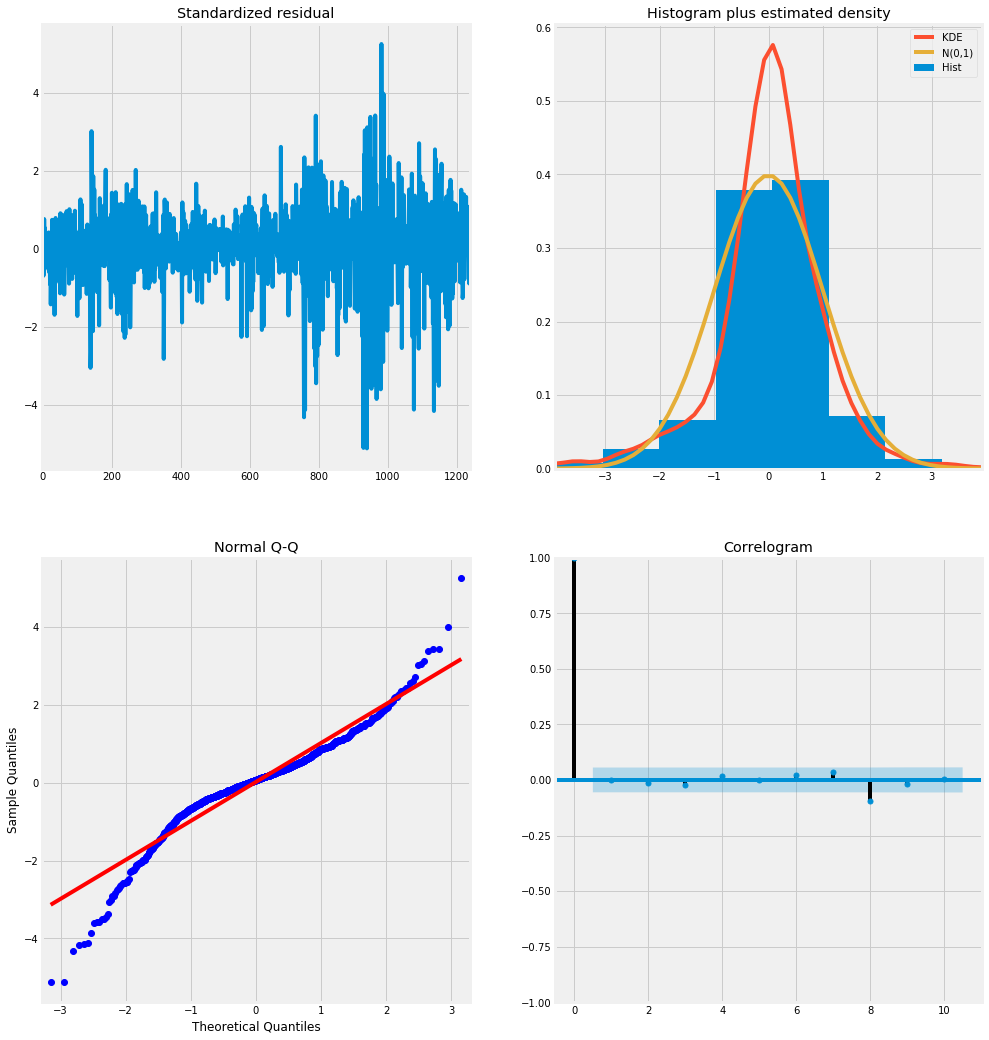

In [11]:
output.plot_diagnostics(figsize=(15, 18))
plt.savefig('qqqoutput.png')
plt.show()

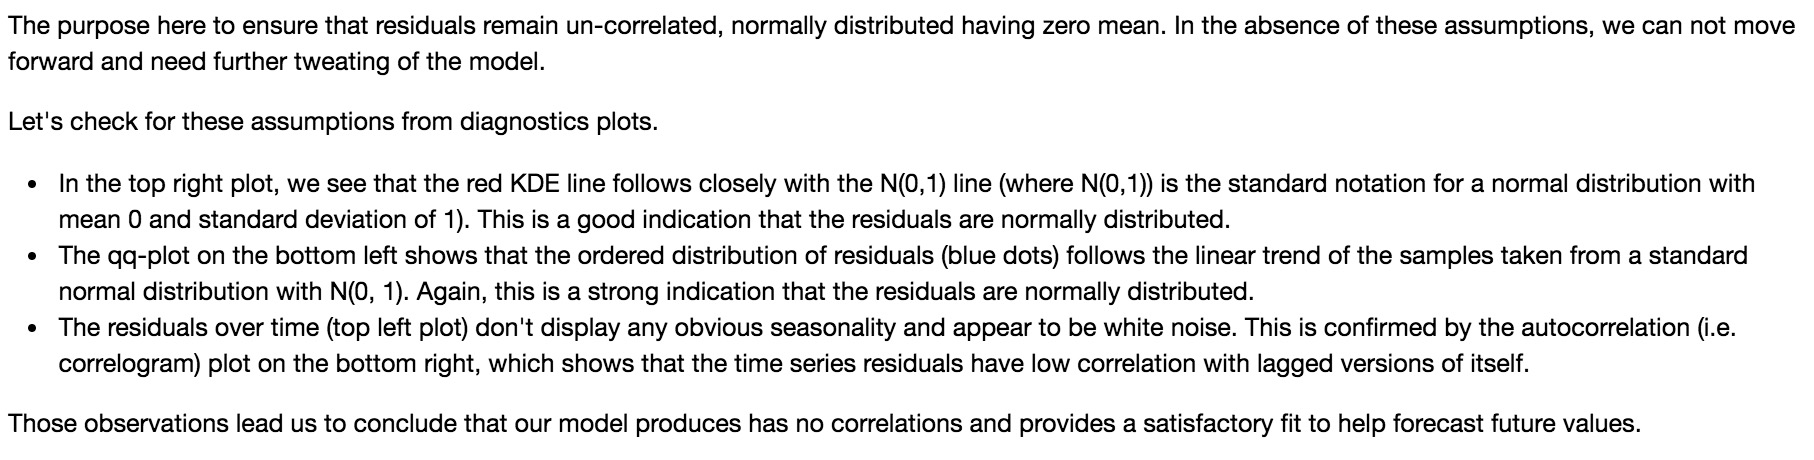

In [31]:
# plt.savefig('arima1.png')

<Figure size 432x288 with 0 Axes>

In [12]:
pred = output.get_prediction(start=pd.to_datetime('2019-11-01'), dynamic=False)
pred_conf = pred.conf_int()

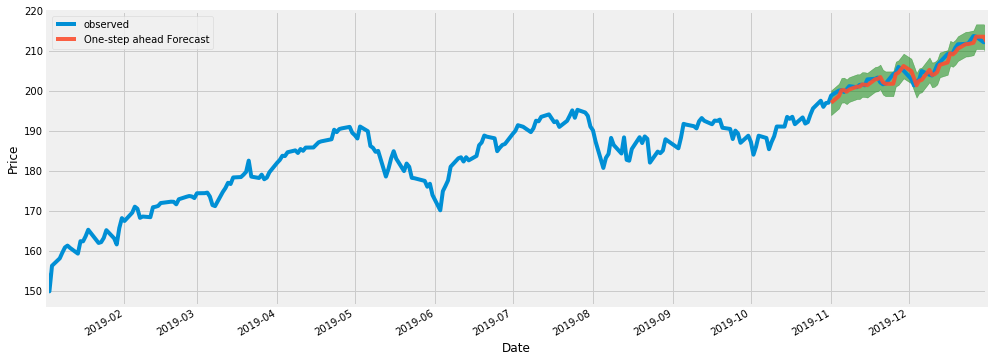

In [13]:
rcParams['figure.figsize'] = 15, 6

#Plot observed values
ax = ts['2019':].plot(label='observed')

#Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9)

#Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=.5)

#Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()

plt.savefig('qqqpred.png')
plt.show()

In [14]:
price_forecasted = pred.predicted_mean
price_truth = ts['2019-11-01':]

# Compute the mean square error
mse = ((price_forecasted - price_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1.25


In [15]:
pred_dynamic = output.get_prediction(start=pd.to_datetime('2019-11-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

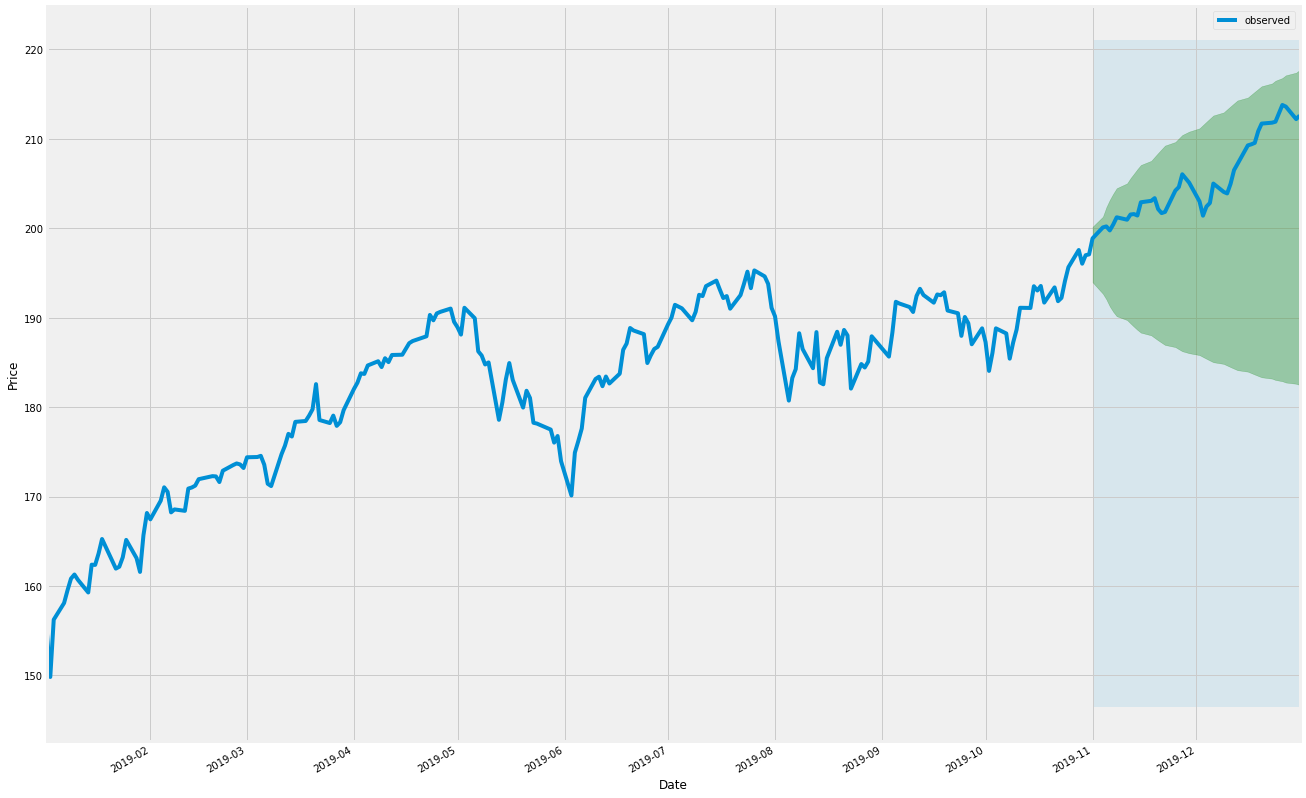

In [16]:
ax = ts['2019':].plot(label='observed', figsize=(20, 15))
# datum.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2019-11-01'), price_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.savefig('qqqpred2.png')
plt.show()

In [17]:
price_forecasted = pred_dynamic.predicted_mean
price_truth = ts['2019-11-01':]

# Compute the mean square error
mse = ((price_forecasted - price_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 55.71


In [18]:
prediction = output.get_forecast(steps=50)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

C:\Users\jayar\anaconda\Anaconda3\envs\PandaSpace\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


## FBProphet for Future

In [19]:
from fbprophet import Prophet as proph
spy = pd.DataFrame(data[0]['close']).reset_index()
spy.columns = ['ds', 'y']

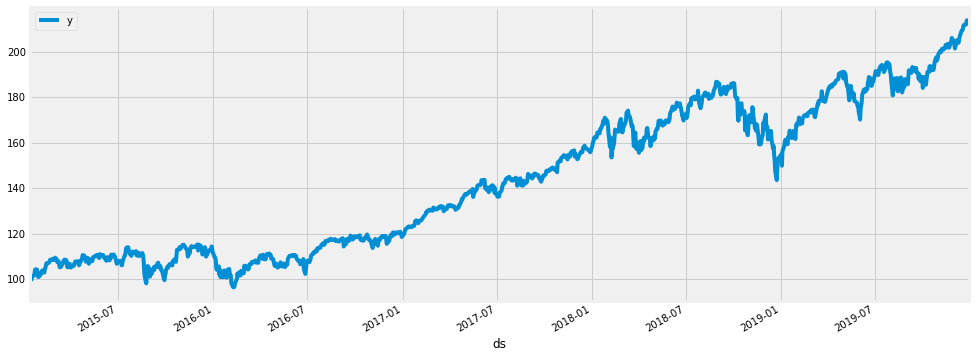

In [20]:
spy.set_index('ds').plot()

In [21]:
p = proph(interval_width=.95)
p.fit(spy)
inp = p.make_future_dataframe(periods=30, freq='D')
out = p.predict(inp)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\jayar\anaconda\Anaconda3\envs\PandaSpace\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [22]:
df = out[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [23]:
spy_df_novjan = df.tail(71)
spy_df_novjan.dtypes

ds            datetime64[ns]
yhat                 float64
yhat_lower           float64
yhat_upper           float64
dtype: object

In [46]:
# def get_iex_data(stock_list, start=datetime(2019,11,1), end=datetime(2020,1,10)):
#     return_list = []
#     for i in stock_list:
#         df = pd.DataFrame(get_historical_data(i, start, end, output_format='pandas', token='pk_d28c0190de7a4d6da30b3bd2b08487c8'))
#         df['ticker'] = i
#         return_list.append(df)
#     return return_list
# etf = ['VV']
# data = get_iex_data(etf)
# pull = data[0]['close']
# pull_df = pd.DataFrame(pull)

In [49]:
# pull_df

In [24]:
spy_yf = pd.read_csv('QQQ_yf.csv')
spy_yf = spy_yf.rename(columns={"Date": "ds"})
spy_yf['ds'] = pd.to_datetime(spy_yf['ds'])

spy_yf.dtypes

ds           datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [25]:
spy_yf1 = spy_yf[['ds','Adj Close']]
spy_yf1

,ds,Adj Close
0,2019-11-04,199.667114
1,2019-11-05,199.776886
2,2019-11-06,199.327850
3,2019-11-07,199.996399
4,2019-11-08,200.794662
5,2019-11-11,200.525253
6,2019-11-12,201.103989
7,2019-11-13,201.153885
8,2019-11-14,200.994232
9,2019-11-15,202.471039


In [32]:
comb = spy_df_novjan.join(spy_yf1.set_index('ds'), on='ds')
# comb = comb.set_index('ds')
comb['difference'] = comb['Adj Close'] - comb['yhat']
comb['difference_pct'] = comb['difference']/comb['Adj Close']
comb['difference_pct'] = comb['difference_pct'].map("{:.2%}".format)
comb.to_csv('vv_predict_fbprophet.csv', encoding='utf-8')
comb = comb.drop([1252])
comb = comb.drop([1255])
comb = comb.drop([1256])
comb.tail(50)

,ds,yhat,yhat_lower,yhat_upper,Adj Close,difference,difference_pct
1229,2019-11-27,202.619257,195.836055,209.413795,205.594254,2.974997,1.45%
1230,2019-11-29,202.916278,196.493501,209.329487,204.656296,1.740018,0.85%
1231,2019-12-02,203.383172,196.621994,210.126659,202.560837,-0.822335,-0.41%
1232,2019-12-03,203.720851,197.017693,210.588164,200.974289,-2.746562,-1.37%
1233,2019-12-04,203.910302,197.099965,211.089822,201.992065,-1.918237,-0.95%
1234,2019-12-05,204.108541,196.823978,210.747144,202.391205,-1.717336,-0.85%
1235,2019-12-06,204.211992,197.591269,210.970924,204.556519,0.344527,0.17%
1236,2019-12-09,204.584582,197.439016,211.778735,203.628525,-0.956057,-0.47%
1237,2019-12-10,204.864615,197.846268,211.845807,203.458893,-1.405722,-0.69%
1238,2019-12-11,204.984829,197.597615,211.962198,204.536545,-0.448284,-0.22%


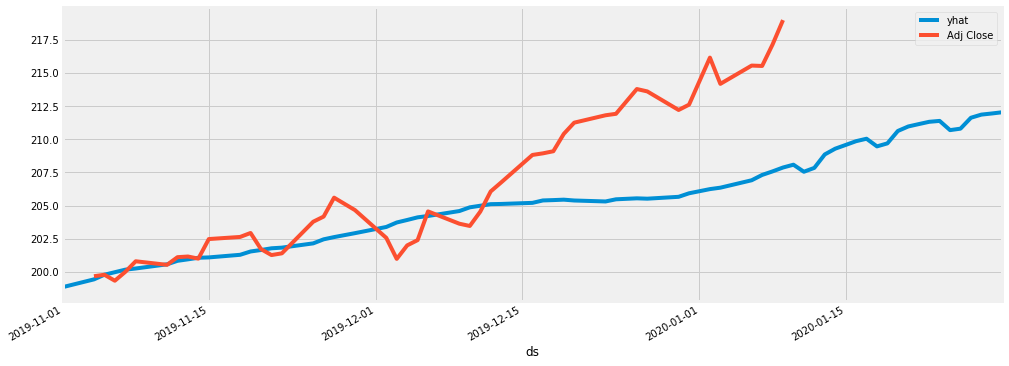

In [33]:
comb.plot(x="ds", y=["yhat", "Adj Close"], kind="line")
plt.savefig('qqq_fbproph_forecast.png')

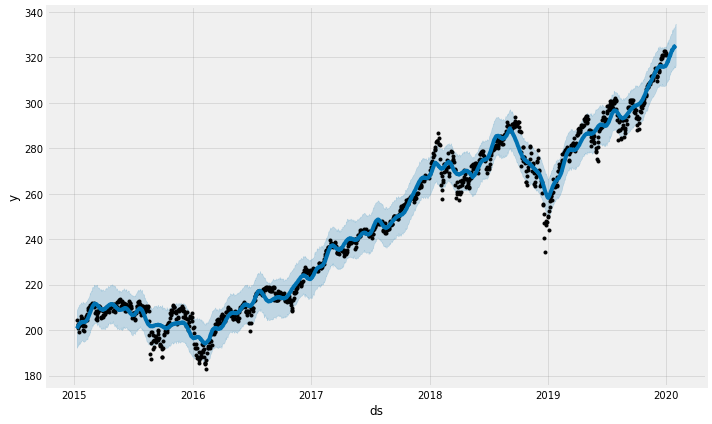

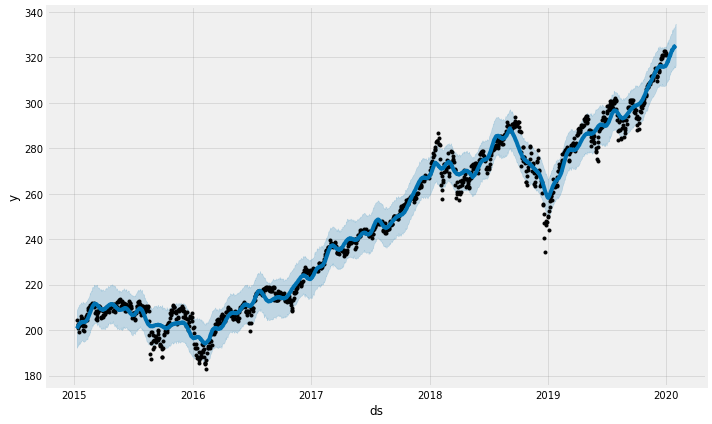

In [44]:
p.plot(df)
plt.savefig('what.png')

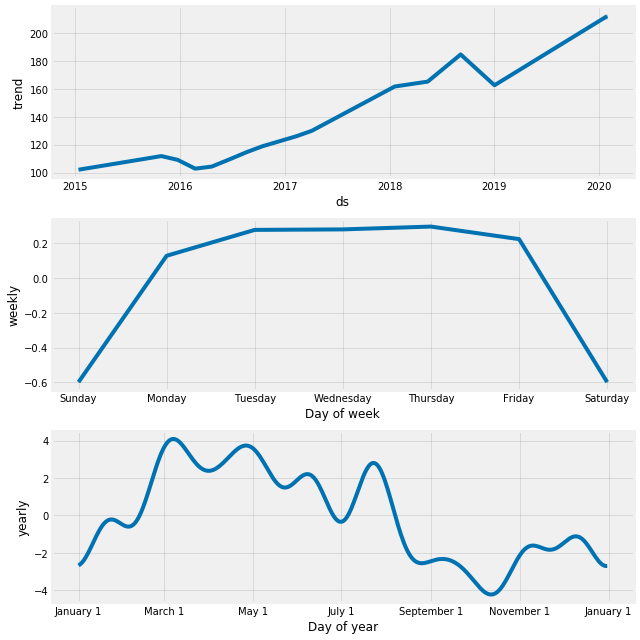

In [28]:
p.plot_components(out)
plt.savefig('qqqmovement.png')

In [29]:
split = pd.to_datetime('2019-12-01')
true = spy.set_index('ds')[split:]
past = spy.set_index('ds')[:split].reset_index()

In [30]:
pro = proph(interval_width=.95)
pro.fit(past)
inp = pro.make_future_dataframe(periods=20, freq='D').set_index('ds')[split:].reset_index()
out = pro.predict(inp)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [31]:
pred = out[['ds', 'yhat']].set_index('ds')